In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sp

In [2]:
df = pd.read_csv('FleetAll.csv')
df=df.drop(columns=['Vehicle Category','GVWR Class','MPO'])
df = df.where(df['Model Year'] != 'Unknown').dropna()

In [3]:
df

,Fuel Type,Model Year,Vehicle Population
1,Diesel,1979,1.0
2,Diesel,1992,1.0
3,Diesel,1993,1.0
4,Diesel,1999,1.0
5,Diesel,2000,3.0
...,...,...,...
397,Gasoline,2017,95789.0
398,Gasoline,2018,99834.0
399,Gasoline,2019,100730.0
400,Gasoline,2020,71194.0


In [4]:
years = np.arange(2018,2036)
years_missing=[2018, 2019, 2020, 2021, 2022, 2026, 2027, 2028,
       2029, 2030, 2031, 2032, 2033, 2034, 2035]
sales_percentage_missing = [7.6,7.6,8.1,12.8,17.9,35,43,51,59,68,76,82,88,94,100]
f= sp.interp1d(years_missing,sales_percentage_missing)
sales_percentage = []
for i in years:
    sales_percentage.append(f(i))


In [5]:
times = df.drop(columns=['Fuel Type'])
times = times.where(times['Model Year'] != 'Unknown').dropna()
times['Model Year'] = times['Model Year'].astype(int)
times = times.groupby(['Model Year']).sum()

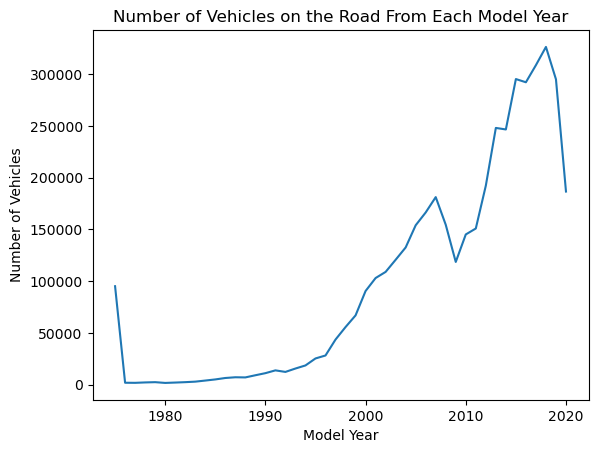

In [6]:
shortened = times.drop(2021, axis = 0)
plt.plot(shortened)
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.show()

In [7]:
f2 = sp.CubicSpline([1980,1990,2002,2015,2018],np.log([1801,11219.0+20000,108976.0+44000,295129.0-60050,326147.0-100000]), 
                    extrapolate=True)

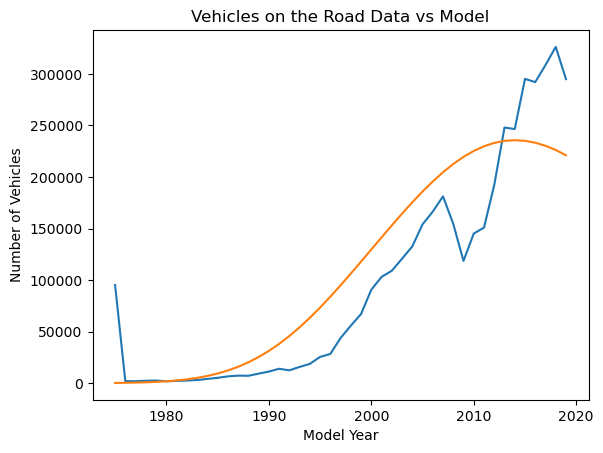

In [8]:
plt.figure()
plt.plot(np.arange(1975,2020),times['Vehicle Population'][np.arange(1975,2020)])
plt.plot(np.arange(1975,2020),np.exp(f2(np.arange(1975,2020))))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Vehicles on the Road Data vs Model')
plt.show()

In [9]:
pops = np.array(times['Vehicle Population'])
coef = sum(pops)/sum(np.exp(f2(range(1960,2020))))
def model(year):
    return coef*np.exp(f2(year))

In [10]:
weighted_model_tot = 0
for i in range(1960,2020):
    weighted_model_tot += model(i)*(i)

weighted_model = weighted_model_tot/sum(pops)
weighted_model

2007.685955221401

In [11]:
sum(pops)/sum(model(range(1960,2020)))

0.9999999999999998

In [12]:
weighted_avg_tot = 0
for i in range(47):
    weighted_avg_tot += pops[i]*(1975+i)

weighted_avg = weighted_avg_tot/sum(pops)
weighted_avg

2009.83158810058

In [13]:
evf = df.where(df['Fuel Type'] == 'Electric').dropna()
evf = evf.where(evf['Model Year'] != 'Unknown').dropna()
evf = evf.drop('Fuel Type', axis = 1)
evf = evf.groupby(['Model Year']).sum()

icef = df.where(df['Fuel Type'] == 'Gasoline').dropna()
icef = icef.where(icef['Model Year'] != 'Unknown').dropna()
icef = icef.drop('Fuel Type', axis = 1)
icef = icef.groupby(['Model Year']).sum()


icef = icef.rename(columns={"Vehicle Population": "ICE Population"})
evf = evf.rename(columns={"Vehicle Population": "EV Population"})
dfn = icef.merge(evf, how = 'outer',on='Model Year')
dfn = dfn.fillna(0)

In [14]:
total_years = np.array(range(1975,2036))
EV_percent = np.array(dfn["EV Population"]/(dfn["EV Population"]+dfn["ICE Population"]))
EV_percent = np.append(EV_percent,sales_percentage[4:])
percents = pd.DataFrame(data = {'total_years': total_years, 'EV_percent': EV_percent})

In [15]:
pred_pop = []
pred_EV = []
for i in range(1960,2020):
    pred_pop.append(model(i))
    pred_EV.append(model(i)*(percents.iloc[i-1960,1])/100)
sum(pred_EV)

1442976.832437629

In [16]:
total_percent_ev = sum(pred_EV)/sum(pred_pop)
total_percent_ev

0.32322201126560557

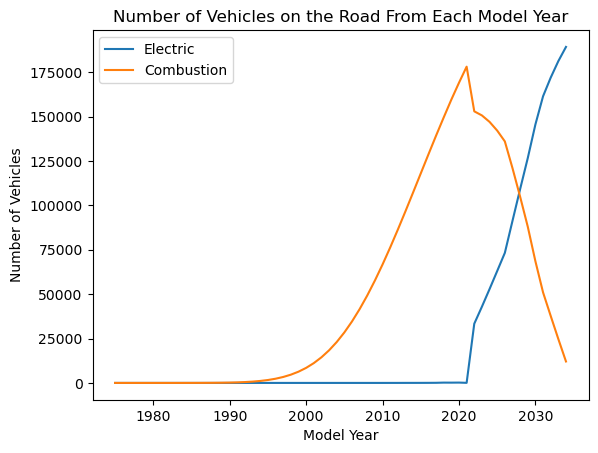

In [17]:
plt.figure()
plt.plot(np.arange(1975,2035),pred_EV)
#plt.plot(np.arange(1975,2035),pred_pop)
plt.plot(np.arange(1975,2035),np.subtract(pred_pop,pred_EV))
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.title('Number of Vehicles on the Road From Each Model Year')
plt.legend(['Electric', 'Combustion'])
plt.show()

In [21]:
np.subtract(pred_pop,pred_EV)

array([6.88474151e-03, 1.66864983e-02, 3.91848044e-02, 8.92082710e-02,
       1.97007140e-01, 4.22281179e-01, 8.79120139e-01, 1.77850983e+00,
       3.49859225e+00, 6.69605051e+00, 1.24764708e+01, 2.26449695e+01,
       4.00606500e+01, 6.91177858e+01, 1.16371345e+02, 1.91314301e+02,
       3.07292423e+02, 4.82523796e+02, 7.41149259e+02, 1.11424071e+03,
       1.64055440e+03, 2.36701936e+03, 3.34867667e+03, 4.64796173e+03,
       6.33328368e+03, 8.47685165e+03, 1.11515972e+04, 1.44275574e+04,
       1.83682212e+04, 2.30258047e+04, 2.84378020e+04, 3.46234524e+04,
       4.15811941e+04, 4.92870145e+04, 5.76959054e+04, 6.67394826e+04,
       7.63276964e+04, 8.63689483e+04, 9.67388579e+04, 1.07337040e+05,
       1.18037343e+05, 1.28721048e+05, 1.39280000e+05, 1.49549382e+05,
       1.59593999e+05, 1.69096687e+05, 1.78150329e+05, 1.52989923e+05,
       1.50688503e+05, 1.47049077e+05, 1.42139303e+05, 1.36053737e+05,
       1.21002675e+05, 1.04897415e+05, 8.80215089e+04, 6.85237163e+04,
      

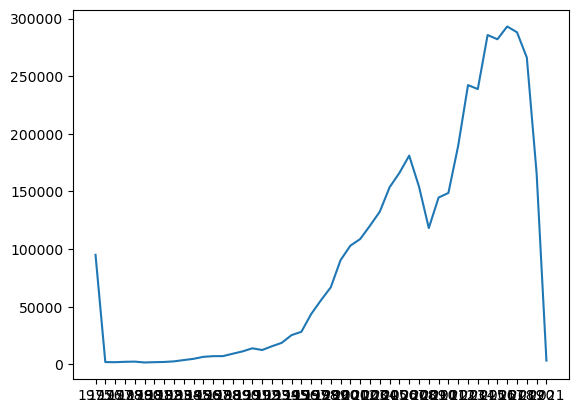

In [18]:
plt.plot(icef)